In [162]:
import pandas as pd
import numpy as np

In [163]:
file_path = 'dataset_cleaned (1).csv' 
df = pd.read_csv(file_path)

In [164]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_name', 'track_album_release_date', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'z_energy', 'z_tempo', 'z_danceability', 'z_loudness',
       'z_acousticness'],
      dtype='object')

In [165]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format='%d/%m/%Y')
df.set_index('track_album_release_date', inplace=True)



In [166]:
print(df.dtypes)


track_id              object
track_name            object
track_artist          object
track_popularity       int64
track_album_name      object
playlist_genre        object
playlist_subgenre     object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
z_energy             float64
z_tempo              float64
z_danceability       float64
z_loudness           float64
z_acousticness       float64
dtype: object


In [167]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
yearly_data = df[numerical_columns].resample('Y').mean()


In [168]:
# Calculate moving averages
yearly_data['popularity_moving_avg'] = yearly_data['track_popularity'].rolling(window=3).mean()  


In [169]:
yearly_data.fillna(method='ffill', inplace=True) 


/var/folders/29/9cgw2krx3cjczf8r_3mszr280000gn/T/ipykernel_32928/1125420942.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  yearly_data.fillna(method='ffill', inplace=True)


In [170]:
# Checking for missing dates
print(yearly_data.isnull().sum())


track_popularity         0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
liveness                 0
valence                  0
tempo                    0
duration_ms              0
z_energy                 0
z_tempo                  0
z_danceability           0
z_loudness               0
z_acousticness           0
popularity_moving_avg    7
dtype: int64


In [171]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(yearly_data['track_popularity'], order=(5, 1, 2))  
model_fit = model.fit(method_kwargs={'maxiter': 500})
forecast = model_fit.forecast(steps=30)  


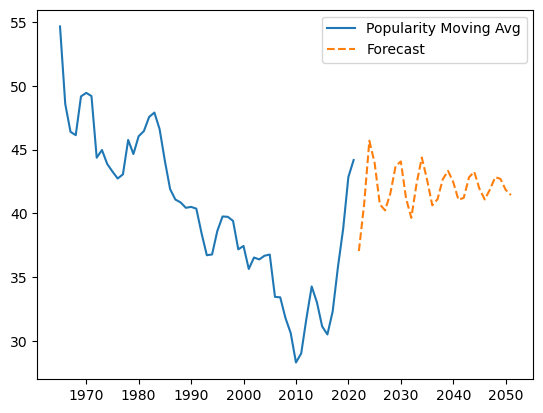

In [172]:
import matplotlib.pyplot as plt


plt.plot(yearly_data.index, yearly_data['popularity_moving_avg'], label='Popularity Moving Avg')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()


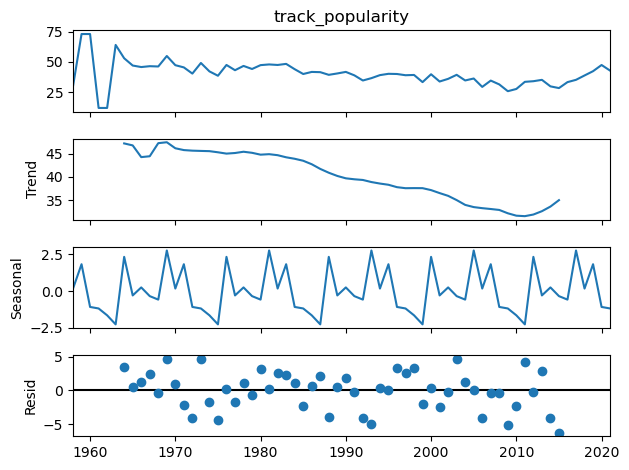

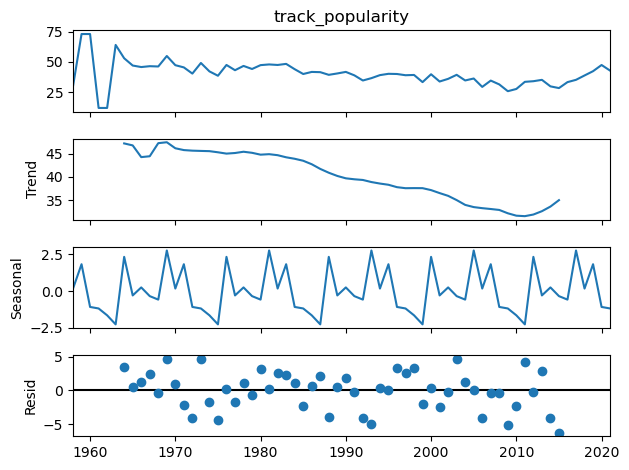

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residuals
decomposition = seasonal_decompose(yearly_data['track_popularity'], model='additive', period=12)

decomposition.plot()


/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45000D+00    |proj g|=  6.50411D-01

At iterate    5    f=  2.89896D+00    |proj g|=  1.65127D-02

At iterate   10    f=  2.89364D+00    |proj g|=  1.01127D-02

At iterate   15    f=  2.89325D+00    |proj g|=  6.10280D-03

At iterate   20    f=  2.89322D+00    |proj g|=  8.17311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   2.002D-05   2.893D+00
  F =   2.8932189310274756     

CONVERG

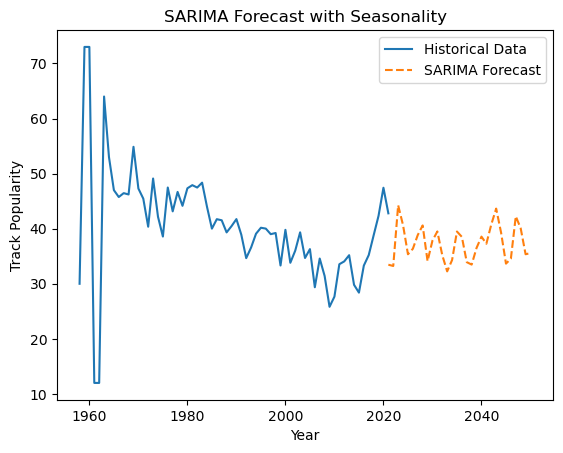

In [176]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model_sarima = SARIMAX(yearly_data['track_popularity'], 
                       order=(2, 1, 1), 
                       seasonal_order=(1, 1, 1, 12)) 
model_fit_sarima = model_sarima.fit()

forecast_sarima = model_fit_sarima.forecast(steps=30    )

future_dates_sarima = pd.date_range(start=yearly_data.index[-1], periods=30, freq='Y')

plt.plot(yearly_data.index, yearly_data['track_popularity'], label='Historical Data')
plt.plot(future_dates_sarima, forecast_sarima, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast with Seasonality')
plt.xlabel('Year')
plt.ylabel('Track Popularity')
plt.legend()
plt.show()


## Multiple Scenarios


In [183]:
# Baseline forecast 
baseline_model = SARIMAX(yearly_data['track_popularity'], 
                         order=(2, 1, 1), 
                         seasonal_order=(1, 1, 1, 12))  
baseline_fit = baseline_model.fit()
baseline_forecast = baseline_fit.forecast(steps=20)  


/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45000D+00    |proj g|=  6.50411D-01

At iterate    5    f=  2.89896D+00    |proj g|=  1.65127D-02

At iterate   10    f=  2.89364D+00    |proj g|=  1.01127D-02

At iterate   15    f=  2.89325D+00    |proj g|=  6.10280D-03

At iterate   20    f=  2.89322D+00    |proj g|=  8.17311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   2.002D-05   2.893D+00
  F =   2.8932189310274756     

CONVERG

In [184]:
# Optimistic scenario 
optimistic_model = SARIMAX(yearly_data['track_popularity'], 
                           order=(2, 1, 1), 
                           seasonal_order=(1, 1, 1, 12))  
optimistic_fit = optimistic_model.fit()
optimistic_forecast = optimistic_fit.forecast(steps=20)


/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45000D+00    |proj g|=  6.50411D-01

At iterate    5    f=  2.89896D+00    |proj g|=  1.65127D-02

At iterate   10    f=  2.89364D+00    |proj g|=  1.01127D-02

At iterate   15    f=  2.89325D+00    |proj g|=  6.10280D-03

At iterate   20    f=  2.89322D+00    |proj g|=  8.17311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   2.002D-05   2.893D+00
  F =   2.8932189310274756     

CONVERG

In [185]:
# Pessimistic scenario 
pessimistic_model = SARIMAX(yearly_data['track_popularity'], 
                            order=(2, 1, 1), 
                            seasonal_order=(1, 1, 0, 12))  
pessimistic_fit = pessimistic_model.fit()
pessimistic_forecast = pessimistic_fit.forecast(steps=20)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19201D+00    |proj g|=  6.27623D-01

At iterate    5    f=  2.91100D+00    |proj g|=  5.87345D-02

At iterate   10    f=  2.89980D+00    |proj g|=  8.95089D-02

At iterate   15    f=  2.89842D+00    |proj g|=  7.44045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   2.653D-05   2.898D+00
  F =   2.8984187250390674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


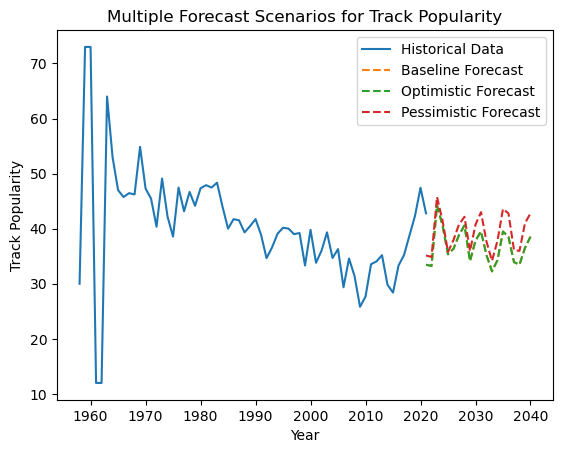

In [186]:
import matplotlib.pyplot as plt

future_dates = pd.date_range(start=yearly_data.index[-1], periods=20, freq='Y')

plt.plot(yearly_data.index, yearly_data['track_popularity'], label='Historical Data')

plt.plot(future_dates, baseline_forecast, label='Baseline Forecast', linestyle='--')

plt.plot(future_dates, optimistic_forecast, label='Optimistic Forecast', linestyle='--')

plt.plot(future_dates, pessimistic_forecast, label='Pessimistic Forecast', linestyle='--')


plt.title('Multiple Forecast Scenarios for Track Popularity')
plt.xlabel('Year')
plt.ylabel('Track Popularity')
plt.legend()
plt.show()


## Genre Trends

In [188]:

genre_data = df.groupby(['track_album_release_date', 'playlist_genre'])['track_popularity'].mean().reset_index()

# Date to Datetime
genre_data['track_album_release_date'] = pd.to_datetime(genre_data['track_album_release_date'])

genre_data.set_index('track_album_release_date', inplace=True)


In [195]:
genre_data.fillna(method='ffill', inplace=True) 

/var/folders/29/9cgw2krx3cjczf8r_3mszr280000gn/T/ipykernel_32928/3604414636.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  genre_data.fillna(method='ffill', inplace=True)


In [197]:
print(genre_data.isnull().sum())

playlist_genre      0
track_popularity    0
dtype: int64


In [198]:

genre_trends = genre_data.groupby('playlist_genre').resample('Y').mean().reset_index()

print(genre_trends.head())


  playlist_genre track_album_release_date  track_popularity
0            edm               1977-12-31               0.0
1            edm               1978-12-31               NaN
2            edm               1979-12-31              27.5
3            edm               1980-12-31              29.0
4            edm               1981-12-31              69.0


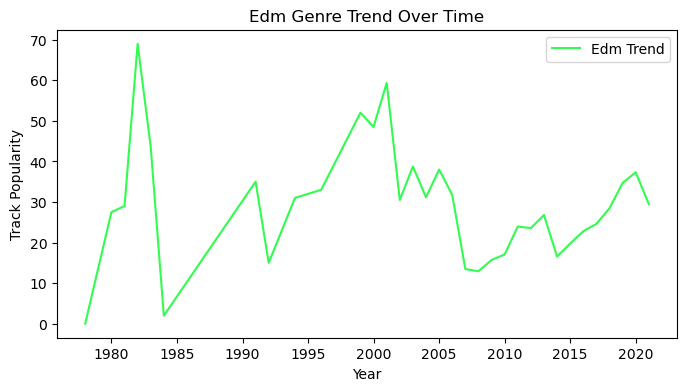

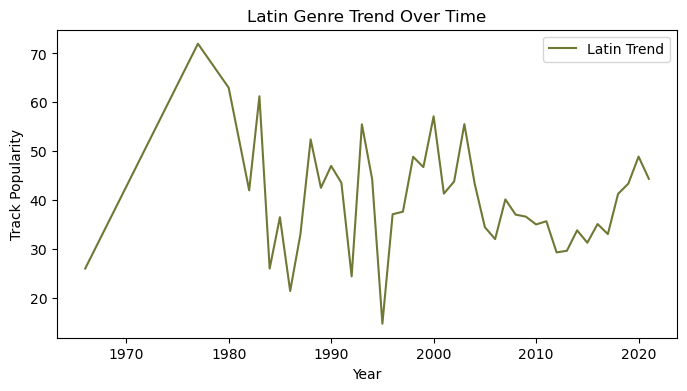

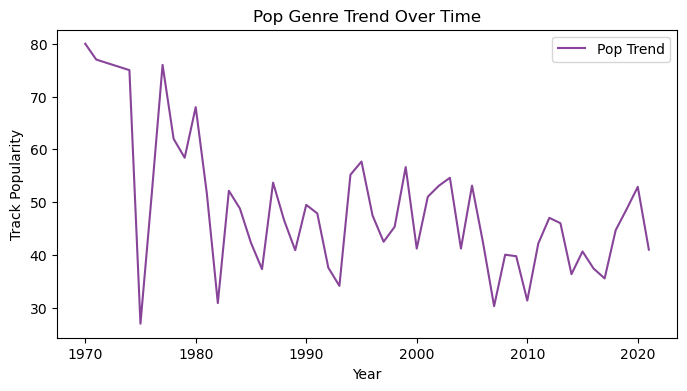

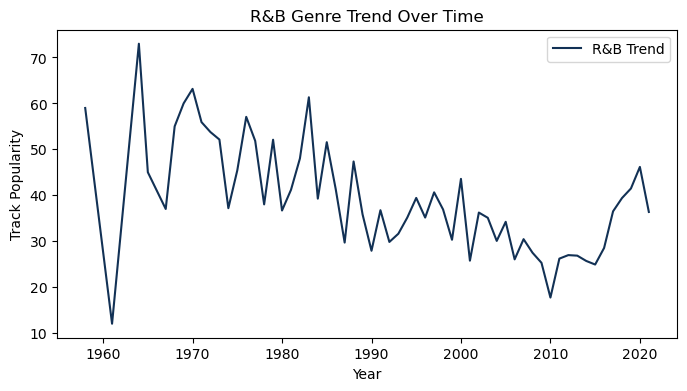

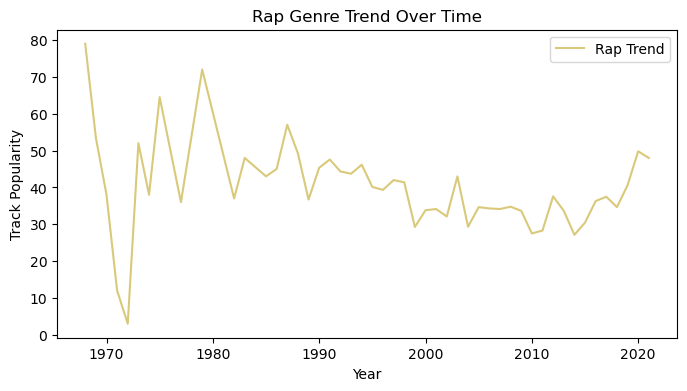

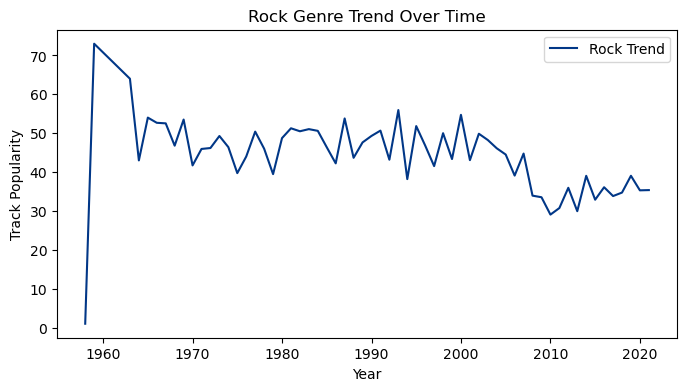

In [207]:
# Historical Data Plots

import seaborn as sns
import matplotlib.pyplot as plt


genre_pivot = genre_trends.pivot(index='track_album_release_date', columns='playlist_genre', values='track_popularity')



genres = ['edm', 'latin', 'pop', 'r&b', 'rap', 'rock']  # List of genres to plot

for g in genres:
    genre_pivot[f'{g.lower()}'] = genre_pivot[f'{g.lower()}'].interpolate()



for genre in genres:
    plt.figure(figsize=(8, 4))
    plt.plot(genre_pivot.index, genre_pivot[genre], label=f'{genre.title()} Trend', color=np.random.rand(3,))
    plt.title(f'{genre.title()} Genre Trend Over Time')
    plt.xlabel('Year')
    plt.ylabel('Track Popularity')
    plt.legend()
    plt.show()





/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10073D+00    |proj g|=  1.69180D-01

At iterate    5    f=  3.02373D+00    |proj g|=  1.15081D-02

At iterate   10    f=  3.02047D+00    |proj g|=  8.03037D-04

At iterate   15    f=  3.02029D+00    |proj g|=  1.38592D-03

At iterate   20    f=  3.02021D+00    |proj g|=  4.29517D-04

At iterate   25    f=  3.02020D+00    |proj g|=  3.38932D-04

At iterate   30    f=  3.02020D+00    |proj g|=  1.32177D-04

At iterate   35    f=  3.02019D+00    |proj g|=  6.65471D-05

At iterate   40    f=  3.02019D+00    |proj g|=  6.09998D-05

At iterate   45    f=  3.02019D+00    |proj g|=  6.85088D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

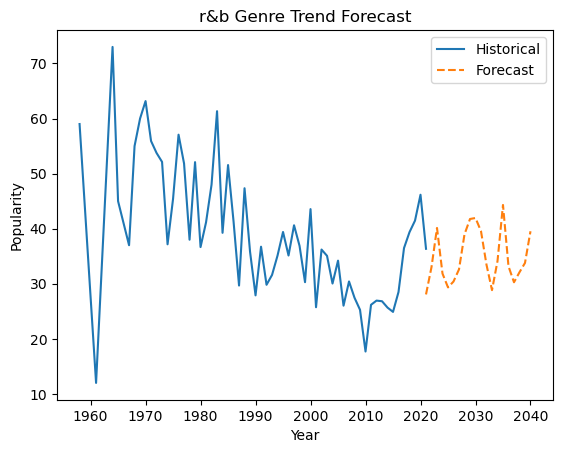

In [219]:

genre_to_forecast = 'r&b'


genre_forecast_data = genre_pivot[genre_to_forecast].dropna()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(genre_forecast_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
# for 5 years
forecast = model_fit.forecast(steps=20)



future_dates = pd.date_range(start=genre_forecast_data.index[-1], periods=20, freq='Y')


plt.plot(genre_forecast_data.index, genre_forecast_data, label='Historical')
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')
plt.title(f'{genre_to_forecast} Genre Trend Forecast')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend()
plt.show()


/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15052D+00    |proj g|=  7.47055D-02

At iterate    5    f=  3.11253D+00    |proj g|=  2.10877D-02

At iterate   10    f=  3.06808D+00    |proj g|=  1.02778D-02

At iterate   15    f=  3.06172D+00    |proj g|=  1.13370D-02

At iterate   20    f=  3.06138D+00    |proj g|=  2.88917D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   1.204D-05   3.061D+00
  F =   3.0613776717773740     

CONVERG

/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24659D+00    |proj g|=  1.19104D-01

At iterate    5    f=  3.08623D+00    |proj g|=  7.93453D-02

At iterate   10    f=  3.06913D+00    |proj g|=  6.01051D-03

At iterate   15    f=  3.06753D+00    |proj g|=  1.66858D-03

At iterate   20    f=  3.06751D+00    |proj g|=  8.30864D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     21      1     0     0   8.309D-06   3.068D+00
  F =   3.0675137139966471     

CONVERG

/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jonathan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jonathan/anaconda3/lib/python3.11/site-pac


At iterate   10    f=  2.92420D+00    |proj g|=  2.88609D-02

At iterate   15    f=  2.90757D+00    |proj g|=  4.03539D-03

At iterate   20    f=  2.90471D+00    |proj g|=  5.94445D-04

At iterate   25    f=  2.90457D+00    |proj g|=  4.95728D-04

At iterate   30    f=  2.90452D+00    |proj g|=  8.95631D-04

At iterate   35    f=  2.90451D+00    |proj g|=  3.60160D-04

At iterate   40    f=  2.90451D+00    |proj g|=  8.44019D-05

At iterate   45    f=  2.90451D+00    |proj g|=  4.63295D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     57      1     0     0   4.633D-05   2.905D+00
  F =   2.90450965476

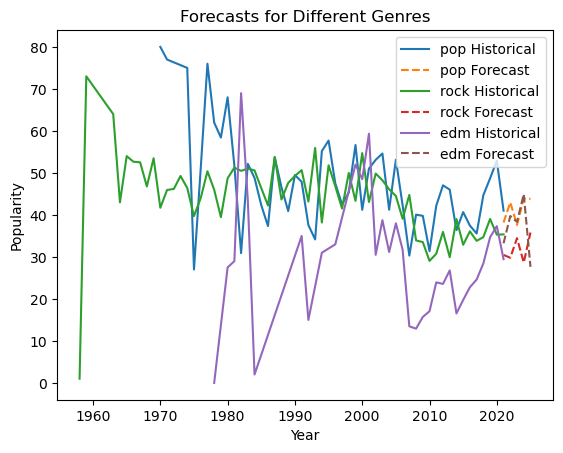

In [221]:
genres = ['pop', 'rock', 'edm']  
for genre in genres:
    
    genre_forecast_data = genre_pivot[genre].dropna()
    model = SARIMAX(genre_forecast_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)
    future_dates = pd.date_range(start=genre_forecast_data.index[-1], periods=5, freq='Y')

   
    plt.plot(genre_forecast_data.index, genre_forecast_data, label=f'{genre} Historical')
    plt.plot(future_dates, forecast, label=f'{genre} Forecast', linestyle='--')

plt.title('Forecasts for Different Genres')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend()
plt.show()
